# Storing a database DUCKDB for ML Prediction


In [1]:
import pandas as pd
import duckdb


In [ ]:
# Dataset
import pandas as pd
import duckdb


df = pd.read_csv("/Users/abdulwasaysiddiqui/Desktop/Legacy/ML Prediction/Dataset/pair_data.csv")

flattened_data = []

for idx, row in df.iterrows():
    prompts = row['prompt']
    for col in ['hq1', 'hq2', 'mq1', 'lq1', 'lq2', 'lq3', 'lq4', 'lq5']:
        flattened_data.append({
            'prompt': prompts,
            'response': row[col],
            'label': col[:2]  # 'hq', 'mq', or 'lq'
        })

flattened_df = pd.DataFrame(flattened_data)


In [48]:
flattened_df.head()

,prompt,response,label
0,"I know I am too big, and I probably should exe...",You are starting to think it’s time to do some...,hq
1,"I know I am too big, and I probably should exe...",You have put a lot of effort into losing weigh...,hq
2,"I know I am too big, and I probably should exe...",You don't know how you'd fit exercise into you...,mq
3,"I know I am too big, and I probably should exe...",It's free to exercise at home. Maybe ride your...,lq
4,"I know I am too big, and I probably should exe...","Do you have a cheap gym near you, like a Plane...",lq


In [49]:
flattened_df.shape

(2544, 3)

In [ ]:

con = duckdb.connect('mental_health_assistant.duckdb.duckdb')
con.execute("CREATE TABLE IF NOT EXISTS pair_responses AS SELECT * FROM flattened_df")
result = con.execute("SELECT * FROM pair_responses LIMIT 5").fetchdf()
print(result)
con.close()


                                              prompt  \
0  I know I am too big, and I probably should exe...   
1  I know I am too big, and I probably should exe...   
2  I know I am too big, and I probably should exe...   
3  I know I am too big, and I probably should exe...   
4  I know I am too big, and I probably should exe...   

                                            response label  
0  You are starting to think it’s time to do some...    hq  
1  You have put a lot of effort into losing weigh...    hq  
2  You don't know how you'd fit exercise into you...    mq  
3  It's free to exercise at home. Maybe ride your...    lq  
4  Do you have a cheap gym near you, like a Plane...    lq  


# Loading data from database

In [ ]:
import duckdb
import pandas as pd

con = duckdb.connect("/Users/abdulwasaysiddiqui/Desktop/Legacy/ML Prediction/mental_health_assistant.duckdb")

tables = con.execute("SHOW TABLES").fetchall()
print("Available tables:", tables)
table_name = tables[0][0]  
df = con.execute(f"SELECT * FROM {table_name}").fetchdf()
print(df.head())


Available tables: [('pair_responses',)]
                                              prompt  \
0  I know I am too big, and I probably should exe...   
1  I know I am too big, and I probably should exe...   
2  I know I am too big, and I probably should exe...   
3  I know I am too big, and I probably should exe...   
4  I know I am too big, and I probably should exe...   

                                            response label  
0  You are starting to think it’s time to do some...    hq  
1  You have put a lot of effort into losing weigh...    hq  
2  You don't know how you'd fit exercise into you...    mq  
3  It's free to exercise at home. Maybe ride your...    lq  
4  Do you have a cheap gym near you, like a Plane...    lq  


In [53]:
df.head()

,prompt,response,label
0,"I know I am too big, and I probably should exe...",You are starting to think it’s time to do some...,hq
1,"I know I am too big, and I probably should exe...",You have put a lot of effort into losing weigh...,hq
2,"I know I am too big, and I probably should exe...",You don't know how you'd fit exercise into you...,mq
3,"I know I am too big, and I probably should exe...",It's free to exercise at home. Maybe ride your...,lq
4,"I know I am too big, and I probably should exe...","Do you have a cheap gym near you, like a Plane...",lq


In [52]:
df.to_csv("pair_data.csv", index=False)

# EDA

In [10]:
df.head()

,prompt,response,label
0,"I know I am too big, and I probably should exe...",You are starting to think it’s time to do some...,hq
1,"I know I am too big, and I probably should exe...",You have put a lot of effort into losing weigh...,hq
2,"I know I am too big, and I probably should exe...",You don't know how you'd fit exercise into you...,mq
3,"I know I am too big, and I probably should exe...",It's free to exercise at home. Maybe ride your...,lq
4,"I know I am too big, and I probably should exe...","Do you have a cheap gym near you, like a Plane...",lq


In [ ]:
import pandas as pd

# Create features
df['prompt_len_words'] = df['prompt'].apply(lambda x: len(str(x).split()))
df['response_len_words'] = df['response'].apply(lambda x: len(str(x).split()))
df['prompt_len_chars'] = df['prompt'].apply(lambda x: len(str(x)))
df['response_len_chars'] = df['response'].apply(lambda x: len(str(x)))
df['length_diff'] = df['response_len_words'] - df['prompt_len_words']


In [12]:
# Group by label and compute averages
length_summary = df.groupby("label")[['prompt_len_words', 'response_len_words', 'length_diff']].mean()

print(length_summary)


       prompt_len_words  response_len_words  length_diff
label                                                   
hq            36.154088           23.617925   -12.536164
lq            36.154088           18.345283   -17.808805
mq            36.154088            9.301887   -26.852201


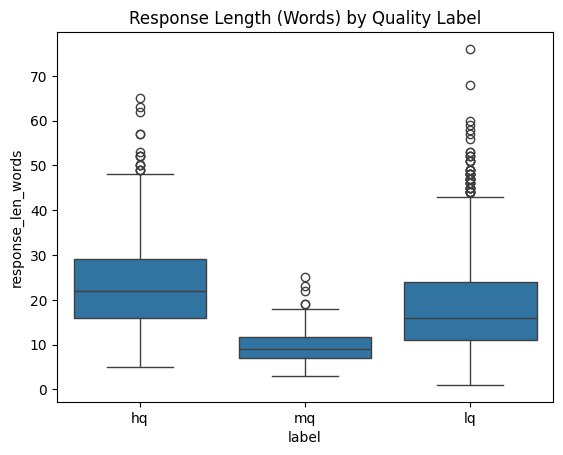

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='label', y='response_len_words')
plt.title("Response Length (Words) by Quality Label")
plt.show()


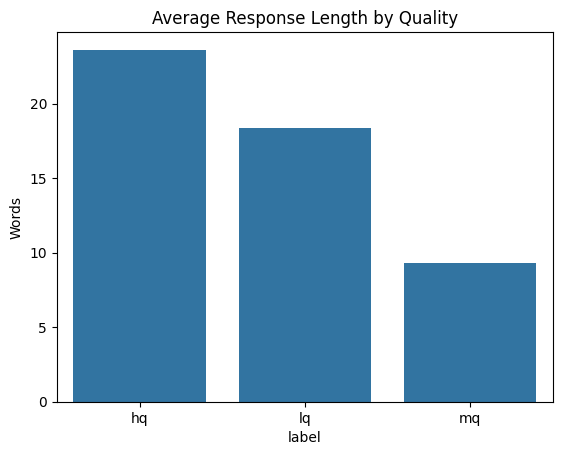

In [14]:
sns.barplot(data=length_summary.reset_index(), x='label', y='response_len_words')
plt.title("Average Response Length by Quality")
plt.ylabel("Words")
plt.show()


/var/folders/84/9qtpncvs6s7b3ystc9ytmht00000gn/T/ipykernel_18279/155586642.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='length_ratio', palette='Set2')


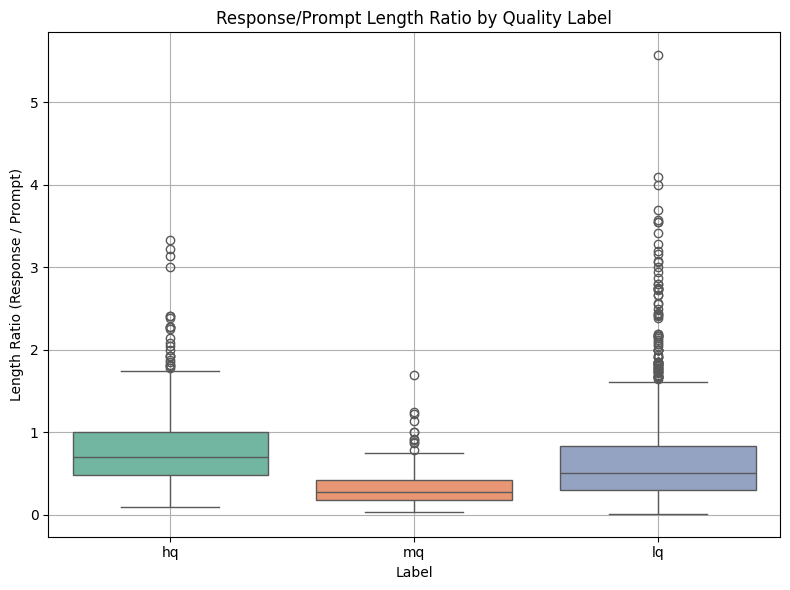

In [ ]:
df['length_ratio'] = df['response_len_words'] / (df['prompt_len_words'] + 1e-5)  # avoid division by zero
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='label', y='length_ratio', palette='Set2')

plt.title("Response/Prompt Length Ratio by Quality Label")
plt.xlabel("Label")
plt.ylabel("Length Ratio (Response / Prompt)")
plt.grid(True)
plt.tight_layout()
plt.show()


label
lq    1590
hq     636
mq     318
Name: count, dtype: int64


/var/folders/84/9qtpncvs6s7b3ystc9ytmht00000gn/T/ipykernel_18279/634576383.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', order=label_counts.index, palette='Set2')


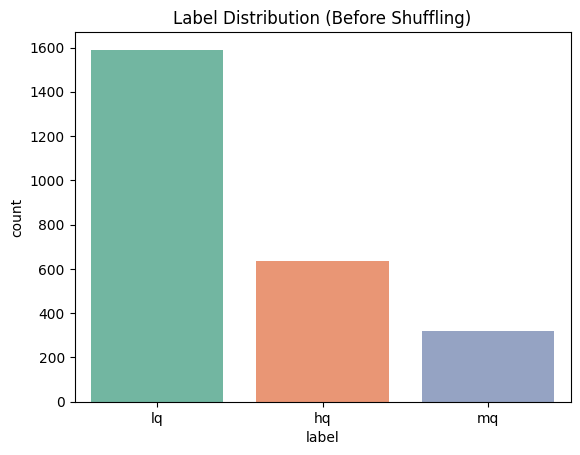

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count by label
label_counts = df['label'].value_counts()
print(label_counts)

# Bar plot
sns.countplot(data=df, x='label', order=label_counts.index, palette='Set2')
plt.title("Label Distribution (Before Shuffling)")
plt.show()


# Feature Engineering

In [ ]:
# Connect to the database file
con = duckdb.connect("mental_health.duckdb")
tables = con.execute("SHOW TABLES").fetchall()
table_name = tables[0][0] 
df = con.execute(f"SELECT * FROM {table_name}").fetchdf()


df.head()

,prompt,response,label
0,"I know I am too big, and I probably should exe...",You are starting to think it’s time to do some...,hq
1,"I know I am too big, and I probably should exe...",You have put a lot of effort into losing weigh...,hq
2,"I know I am too big, and I probably should exe...",You don't know how you'd fit exercise into you...,mq
3,"I know I am too big, and I probably should exe...",It's free to exercise at home. Maybe ride your...,lq
4,"I know I am too big, and I probably should exe...","Do you have a cheap gym near you, like a Plane...",lq


## Creating text

In [ ]:
# Concatenate prompt and response into a single text column
df['text'] = "Prompt: " + df['prompt'].str.strip() + "\nResponse: " + df['response'].str.strip()

df.head()


,prompt,response,label,text
0,"I know I am too big, and I probably should exe...",You are starting to think it’s time to do some...,hq,"Prompt: I know I am too big, and I probably sh..."
1,"I know I am too big, and I probably should exe...",You have put a lot of effort into losing weigh...,hq,"Prompt: I know I am too big, and I probably sh..."
2,"I know I am too big, and I probably should exe...",You don't know how you'd fit exercise into you...,mq,"Prompt: I know I am too big, and I probably sh..."
3,"I know I am too big, and I probably should exe...",It's free to exercise at home. Maybe ride your...,lq,"Prompt: I know I am too big, and I probably sh..."
4,"I know I am too big, and I probably should exe...","Do you have a cheap gym near you, like a Plane...",lq,"Prompt: I know I am too big, and I probably sh..."


In [60]:
df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)
df['label_encoded'] = df['label'].map({'lq': 0, 'hq': 1, 'mq': 2}) 
df.head()

,prompt,response,label,text,label_encoded
0,We eat at Wendy’s a few times a week. It’s che...,You know that there are better options than fa...,hq,Prompt: We eat at Wendy’s a few times a week. ...,1
1,"Of course, I want a healthy baby, I just need ...",Your little boy is worried that you might harm...,hq,"Prompt: Of course, I want a healthy baby, I ju...",1
2,I do feel like giving up sometimes but I don’t...,"We are not always motivated, but rest assured ...",lq,Prompt: I do feel like giving up sometimes but...,0
3,Can I? I heard teenagers can’t breastfeed.,You think teenagers can't breastfeed.,mq,Prompt: Can I? I heard teenagers can’t breast...,2
4,"I quit when my wife decided to quit, because I...","Your wife’s wellbeing, both mental and physica...",hq,"Prompt: I quit when my wife decided to quit, b...",1


## Handle Label Imbalance

In [ ]:
## import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# Stratified split (80-20)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['text'].tolist(),
    df['label_encoded'].tolist(),
    test_size=0.2,
    stratify=df['label_encoded'],
    random_state=42
)

## Class weight

In [ ]:
import numpy as np
import torch
from sklearn.utils.class_weight import compute_class_weight

classes = np.array([0, 1, 2])

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=df['label_encoded']
)

class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)  


# Modeling

In [54]:
## Libraries
import torch
from transformers import BertForSequenceClassification, BertTokenizer, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, f1_score
from torch.nn.utils import clip_grad_norm_
from torch.optim import AdamW 
import numpy as np
import random


In [ ]:
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def tokenize_function(texts):
    return tokenizer(texts, padding=True, truncation=True, max_length=512)


In [ ]:
train_encodings = tokenize_function(train_texts)
val_encodings = tokenize_function(val_texts)


In [ ]:
train_labels_tensor = torch.tensor(train_labels)
val_labels_tensor = torch.tensor(val_labels)


In [65]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)


In [66]:
train_dataset = CustomDataset(train_encodings, train_labels_tensor)
val_dataset = CustomDataset(val_encodings, val_labels_tensor)

train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=8)


In [ ]:
optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)
num_epochs = 5
num_training_steps = len(train_dataloader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)


In [ ]:
# early stopping with patience=3
class EarlyStopping:
    def __init__(self, patience=3, delta=0):
        self.patience = patience
        self.delta = delta
        self.best_val_loss = float('inf')
        self.counter = 0

    def __call__(self, val_loss):
        if val_loss < self.best_val_loss - self.delta:
            self.best_val_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1

        if self.counter >= self.patience:
            return True  
        return False


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

early_stopping = EarlyStopping(patience=3, delta=0.01)

best_val_loss = float('inf')
best_model_state = None

for epoch in range(num_epochs):
    model.train()
    train_loss = 0

    for batch in train_dataloader:
        optimizer.zero_grad()
        inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
        labels = batch['labels'].to(device)

        outputs = model(**inputs, labels=labels)
        loss = outputs.loss
        loss.backward()

        clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()

        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_dataloader)
    print(f"Epoch {epoch + 1}, Training Loss: {avg_train_loss}")

    # Evaluation phase
    model.eval()
    val_loss = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in val_dataloader:
            inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
            labels = batch['labels'].to(device)

            outputs = model(**inputs, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            val_loss += loss.item()
            preds = torch.argmax(logits, dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())

    avg_val_loss = val_loss / len(val_dataloader)
    val_f1 = f1_score(all_labels, all_preds, average='macro')
    print(f"Epoch {epoch + 1}, Validation Loss: {avg_val_loss}, F1 Score: {val_f1}")

    if avg_val_loss < best_val_loss:
        print(f"Validation loss improved from {best_val_loss:.4f} to {avg_val_loss:.4f}. Saving model weights...")
        best_val_loss = avg_val_loss
        best_model_state = model.state_dict()

    if early_stopping(avg_val_loss):
        print("Early stopping triggered!")
        break

# Save only the best model after training ends
if best_model_state:
    model.load_state_dict(best_model_state)
    model.cpu()  # move to CPU before saving
    model.save_pretrained('./best_model', safe_serialization=False)
    tokenizer.save_pretrained('./best_model')
    print("Best model and tokenizer saved in ./best_model")
else:
    print("No best model to save.")


Epoch 1, Training Loss: 0.4403039020139213
Epoch 1, Validation Loss: 0.1871433703636285, F1 Score: 0.8956802354588773
Validation loss improved from inf to 0.1871. Saving model weights...
Epoch 2, Training Loss: 0.15674879703871614
Epoch 2, Validation Loss: 0.1691037587261235, F1 Score: 0.9330089392922826
Validation loss improved from 0.1871 to 0.1691. Saving model weights...
Epoch 3, Training Loss: 0.06788978148183292
Epoch 3, Validation Loss: 0.17515307337498598, F1 Score: 0.9336972206537424
Epoch 4, Training Loss: 0.03702861796893344
Epoch 4, Validation Loss: 0.21125022303658625, F1 Score: 0.9325877460517927
Epoch 5, Training Loss: 0.017869751690544517
Epoch 5, Validation Loss: 0.19258440241719654, F1 Score: 0.9346967269429759
Early stopping triggered!
✅ Best model and tokenizer saved in ./best_model


# Model Evaluation

In [70]:
from collections import Counter
print("Validation label distribution:", Counter(all_labels))
print("Predicted label distribution:", Counter(all_preds))


Validation label distribution: Counter({0: 318, 1: 127, 2: 64})
Predicted label distribution: Counter({0: 313, 1: 129, 2: 67})


In [71]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(all_labels, all_preds))
print(classification_report(all_labels, all_preds))


[[312   5   1]
 [  0 119   8]
 [  1   5  58]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       318
           1       0.92      0.94      0.93       127
           2       0.87      0.91      0.89        64

    accuracy                           0.96       509
   macro avg       0.93      0.94      0.93       509
weighted avg       0.96      0.96      0.96       509



# Loading Model and Testing the results

In [ ]:
import torch
from transformers import BertForSequenceClassification, BertTokenizer

model = BertForSequenceClassification.from_pretrained('wasay8/bert-mental-health-lq-hq-mq')
tokenizer = BertTokenizer.from_pretrained('wasay8/bert-mental-health-lq-hq-mq')


label_map = {0: "Low Quality", 1: "High Quality", 2: "Mid Quality"}

prompt= "I've been feeling down for a while now. It's hard to find motivation for anything. I know I should be doing things to feel better, but nothing seems to help. It's like I'm stuck in a rut and can't get out."
response= "You’re feeling stuck in a negative cycle, and it’s hard to find the energy to make things better. Even though you know what might help, you’re struggling to break free from this feeling of being stuck."

input_text = "Prompt: " + prompt.strip() + "\nResponse: " + response.strip()

def classify_quality(input_text):
    inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True, max_length=128)
    
    model.eval() 
    with torch.no_grad():  
        outputs = model(**inputs)
    
    predictions = torch.argmax(outputs.logits, dim=-1)
    return predictions.item()

predicted_label = classify_quality(input_text)

predicted_response = label_map[predicted_label]

print(f"Prompt: {prompt}")
print(f"Response: {response}")
print(f"Predicted Response Quality: {predicted_response}")


Prompt: I've been feeling down for a while now. It's hard to find motivation for anything. I know I should be doing things to feel better, but nothing seems to help. It's like I'm stuck in a rut and can't get out.
Response: You’re feeling stuck in a negative cycle, and it’s hard to find the energy to make things better. Even though you know what might help, you’re struggling to break free from this feeling of being stuck.
Predicted Response Quality: High Quality


In [ ]:
Prompt="I do feel like giving up sometimes but I don’t think that means I am depressed."
Response=" We are not always motivated, but rest assured that if you give up, it will be the worst for you."
input_text = "Prompt: " + Prompt.strip() + "\nResponse: " + Response.strip()

print(input_text)
predicted_label = classify_quality(input_text)
print(predicted_label)

predicted_response = label_map[predicted_label]
print(f"Predicted Response Quality: {predicted_response}")

Prompt: I do feel like giving up sometimes but I don’t think that means I am depressed.
Response: We are not always motivated, but rest assured that if you give up, it will be the worst for you.
0
Predicted Response Quality: Low Quality


# Model size

In [90]:
import os

def get_folder_size(folder_path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(folder_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            total_size += os.path.getsize(fp)
    return total_size

model_path = './best_model'
size_bytes = get_folder_size(model_path)
size_mb = size_bytes / (1024 * 1024)

print(f"Model size: {size_mb:.2f} MB")


Model size: 417.67 MB


In [ ]:
tokenizer_path = './tokenizer'
tokenizer_size_bytes = get_folder_size(tokenizer_path)
tokenizer_size_mb = tokenizer_size_bytes / (1024 * 1024)
print(f"Tokenizer size: {tokenizer_size_mb:.2f} MB")


Tokenizer size: 0.22 MB
